#**CIENCIA Y ANALÍTICA DE DATOS - MIGUEL MARINES**
##**<u>Ingeniería de Características (FE)</u>**
---
---

In [45]:
# Google Drive en Google Colab.
# Acceso a los archivos y directorios almacenados en Google Drive desde un notebook de Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Importación de la librería "os" para manipular rutas de archivos.
# Ruta del directorio que se desea establecer como directorio de trabajo.
# Se cambia el directorio de trabajo actual al especificado en la variable "DIR".
import os
DIR = "/content/drive/MyDrive/Ciencia_Analitica_Datos"
os.chdir(DIR)

In [47]:
pip install category_encoders

In [48]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import yeojohnson
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

In [49]:
# Carga de archivo CSV.
cars_df = pd.read_csv('vehicles.csv')
# DataFrame
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [50]:
# Información DataFrame
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Eliminación de las columnas que no son relevantes : `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [51]:
# Eliminación columnas.
cars_df = cars_df.drop(columns = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date'])

1b) Se almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [52]:
# Variables con número de registros y columnas.
cantidad_registros, numero_columnas = cars_df.shape

# Mostrar resultados.
print("Cantidad de Observaciones (Registros):", cantidad_registros)
print("Número de Columnas:", numero_columnas)

Cantidad de Observaciones (Registros): 426880
Número de Columnas: 20


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  se utiliza un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Además estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Se determina el porcentaje de valores faltantes por columna y se elimina aquellas que posean el 30% o más de valores perdidos. Para ello se utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [53]:
# Cálculo de porcentaje de valores faltantes por columna.
porcentaje_faltantes = (cars_df.isnull().sum() / len(cars_df)) * 100

# Formato y mostrar el porcentaje de valores faltantes.
porcentaje_faltantes_formateado = porcentaje_faltantes.apply(lambda x: f'{x:.2f}%')
print("Porcentaje de Valores Faltantes por Columna:")
print(porcentaje_faltantes_formateado)

Porcentaje de Valores Faltantes por Columna:
region            0.00%
region_url        0.00%
price             0.00%
year              0.28%
manufacturer      4.13%
model             1.24%
condition        40.79%
cylinders        41.62%
fuel              0.71%
odometer          1.03%
title_status      1.93%
transmission      0.60%
drive            30.59%
size             71.77%
type             21.75%
paint_color      30.50%
county          100.00%
state             0.00%
lat               1.53%
long              1.53%
dtype: object


In [54]:
# Calcular el porcentaje de valores faltantes por columna.
porcentaje_faltantes = (cars_df.isnull().sum() / len(cars_df)) * 100

# Eliminación de columnas que superan el umbral de 30% de valores faltantes.
cars_df = cars_df.dropna(axis = 1, thresh = len(cars_df) * (1 - 0.3))

In [55]:
# Cálculo de porcentaje de valores faltantes por columna.
porcentaje_faltantes = (cars_df.isnull().sum() / len(cars_df)) * 100

# Formato y mostrar el porcentaje de valores faltantes.
porcentaje_faltantes_formateado = porcentaje_faltantes.apply(lambda x: f'{x:.2f}%')
print("Porcentaje de Valores Faltantes por Columna:")
print(porcentaje_faltantes_formateado)

Porcentaje de Valores Faltantes por Columna:
region           0.00%
region_url       0.00%
price            0.00%
year             0.28%
manufacturer     4.13%
model            1.24%
fuel             0.71%
odometer         1.03%
title_status     1.93%
transmission     0.60%
type            21.75%
state            0.00%
lat              1.53%
long             1.53%
dtype: object


In [56]:
# Cálculo del número de columnas eliminadas.
columnas_actuales =  numero_columnas - cars_df.shape[1]
print("Se eliminaron:", columnas_actuales, "columnas")

Se eliminaron: 6 columnas


Cuando se tienen grandes conjuntos de datos, se pueden eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Se borran los registros que contienen `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [57]:
# Eliminación de registros de columnas con menos del 5% de valores faltantes.
columnas_nan = cars_df.columns[cars_df.isna().sum() / len(cars_df) < 0.05]
cars_df = cars_df.dropna(subset = columnas_nan)

In [58]:
# Cálculo de porcentaje de valores faltantes por columna.
porcentaje_faltantes = (cars_df.isnull().sum() / len(cars_df)) * 100

# Formato y mostrar el porcentaje de valores faltantes.
porcentaje_faltantes_formateado = porcentaje_faltantes.apply(lambda x: f'{x:.2f}%')
print("Porcentaje de Valores Faltantes por Columna:")
print(porcentaje_faltantes_formateado)

Porcentaje de Valores Faltantes por Columna:
region           0.00%
region_url       0.00%
price            0.00%
year             0.00%
manufacturer     0.00%
model            0.00%
fuel             0.00%
odometer         0.00%
title_status     0.00%
transmission     0.00%
type            21.49%
state            0.00%
lat              0.00%
long             0.00%
dtype: object


In [59]:
# Cálculo de registros actuales y porcentaje de registros eliminados.
registros_actuales =  cantidad_registros - cars_df.shape[0]
porcentaje_eliminado = (registros_actuales / cantidad_registros) * 100

# Mostrar Resultados.
print("Se eliminaron:", registros_actuales, "registros")
print(f"Se eliminó el {porcentaje_eliminado:.2f}% de los registros.")

Se eliminaron: 43391 registros
Se eliminó el 10.16% de los registros.


2c) Si hay variables que aún poseen valores faltantes, se utiliza el método de imputación apropiado (`mean, median, mode`)

In [60]:
# Tipo de dato de la variable con valores faltantes.
cars_df['type'].info()

<class 'pandas.core.series.Series'>
Int64Index: 383489 entries, 27 to 426879
Series name: type
Non-Null Count   Dtype 
--------------   ----- 
301094 non-null  object
dtypes: object(1)
memory usage: 5.9+ MB


In [61]:
# Calcula la moda de la columna 'type'.
moda_type = cars_df['type'].mode()[0]

# Imputa la moda en los valores faltantes de la columna 'type'.
cars_df['type'].fillna(moda_type, inplace = True)

In [62]:
# Cálculo de porcentaje de valores faltantes por columna.
porcentaje_faltantes = (cars_df.isnull().sum() / len(cars_df)) * 100

# Formato y mostrar el porcentaje de valores faltantes.
porcentaje_faltantes_formateado = porcentaje_faltantes.apply(lambda x: f'{x:.2f}%')
print("Porcentaje de Valores Faltantes por Columna:")
print(porcentaje_faltantes_formateado)

Porcentaje de Valores Faltantes por Columna:
region          0.00%
region_url      0.00%
price           0.00%
year            0.00%
manufacturer    0.00%
model           0.00%
fuel            0.00%
odometer        0.00%
title_status    0.00%
transmission    0.00%
type            0.00%
state           0.00%
lat             0.00%
long            0.00%
dtype: object


## Valores atípicos

3a) Histograma de las variables `price`, `year` y `odometer` para observar su distribución.

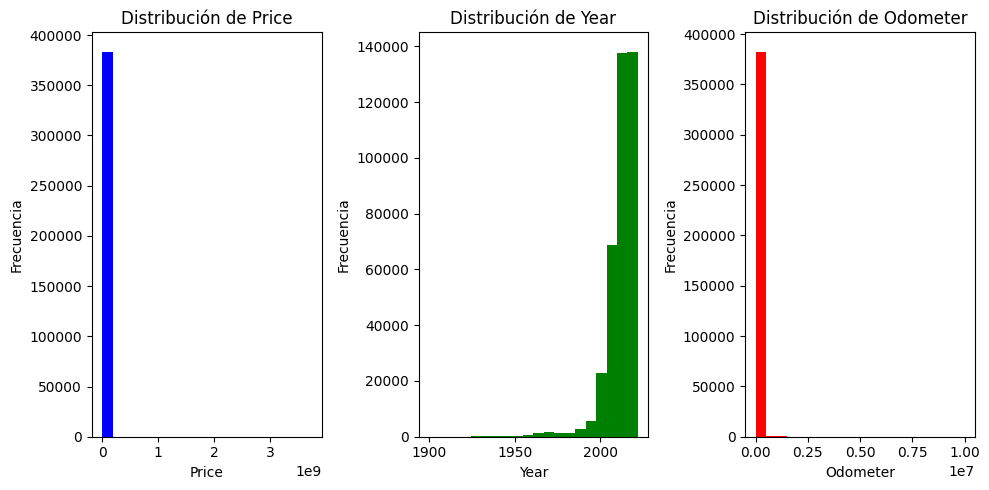

In [63]:
# Histograma Matplotlib.
# Subgráficos histrogramas.
plt.figure(figsize = (10, 5))

# Histograma variable 'price'.
plt.subplot(1, 3, 1)
plt.hist(cars_df['price'], bins = 20, color = 'blue')
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# Histograma variable 'year'.
plt.subplot(1, 3, 2)
plt.hist(cars_df['year'], bins = 20, color = 'green')
plt.title('Distribución de Year')
plt.xlabel('Year')
plt.ylabel('Frecuencia')

# Histograma variable 'odometer'.
plt.subplot(1, 3, 3)
plt.hist(cars_df['odometer'], bins = 20, color = 'red')
plt.title('Distribución de Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frecuencia')

# Mostrar histogramas.
plt.tight_layout()
plt.show()

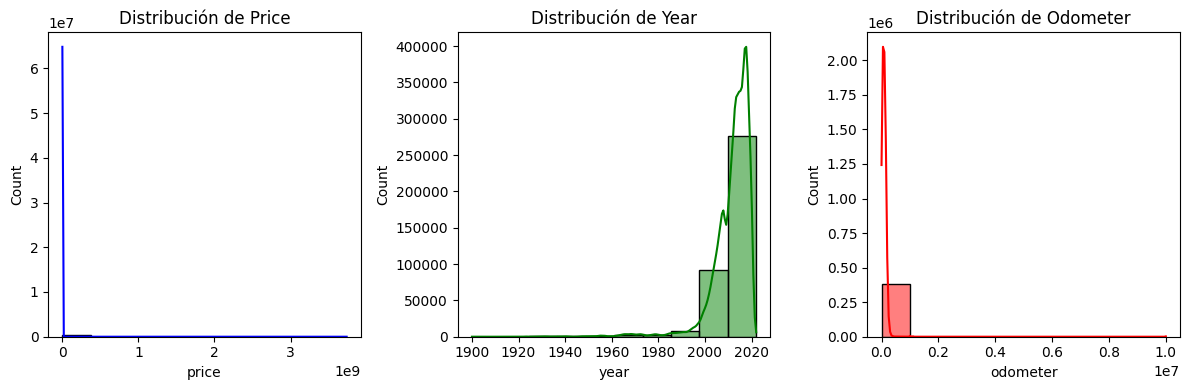

In [64]:
# Histograma Seaborn.
# Subgráficos histrogramas.
plt.figure(figsize = (12, 4))

# Histograma variable 'price'.
plt.subplot(1, 3, 1)
sns.histplot(data = cars_df, x='price', bins = 10, kde = True, color = 'blue')
plt.title('Distribución de Price')

# Histograma variable 'year'.
plt.subplot(1, 3, 2)
sns.histplot(data = cars_df, x = 'year', bins = 10, kde = True, color = 'green')
plt.title('Distribución de Year')

# Histograma variable 'odometer'.
plt.subplot(1, 3, 3)
sns.histplot(data = cars_df, x = 'odometer', bins = 10, kde = True, color = 'red')
plt.title('Distribución de Odometer')

# Mostrar histogramas.
plt.tight_layout()
plt.show()

<ipython-input-65-d6a104a9df9c>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i)


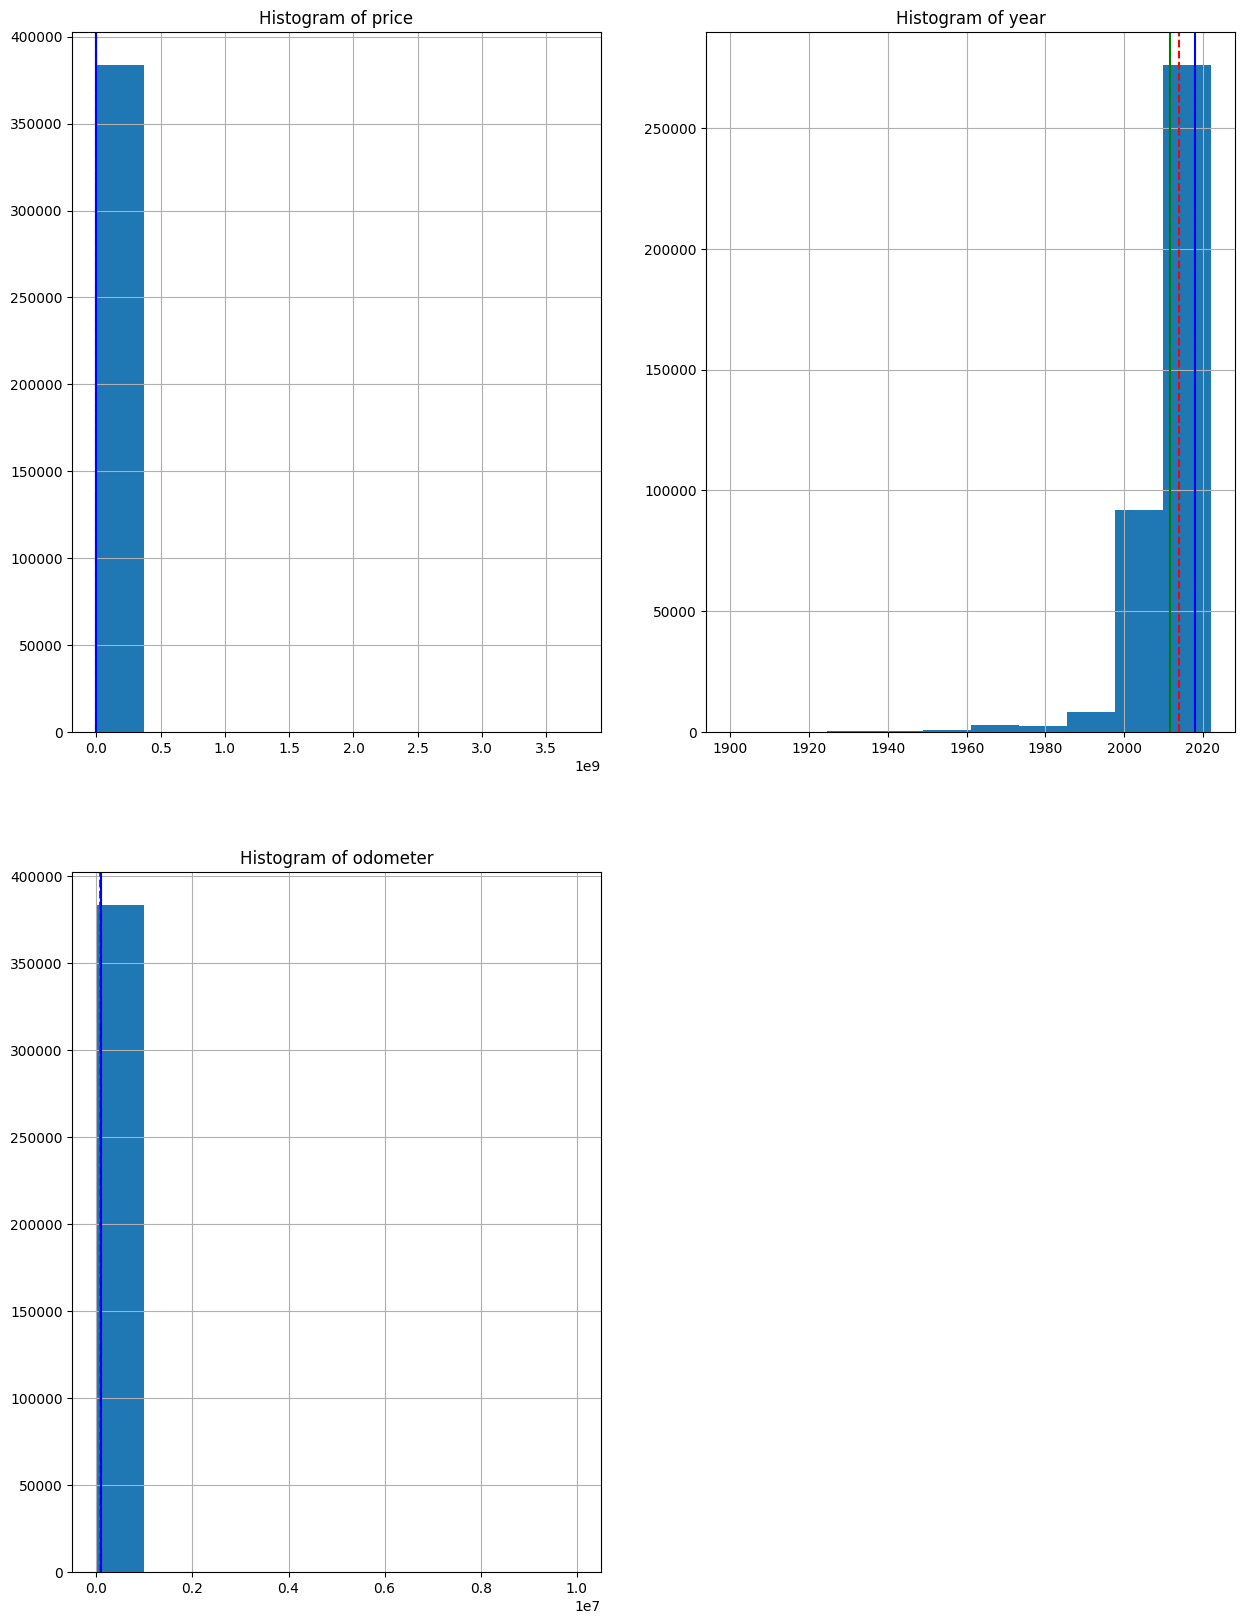

In [65]:
plt.figure(figsize = (15, 20))
set_columns = ['price', 'year', 'odometer']
cars_df['price'].hist()
for i, col in enumerate(set_columns, 1):
    media = cars_df[col].mean()
    median = cars_df[col].median()
    mode = cars_df[col].mode().iloc[0]
    plt.subplot(2,2,i)
    cars_df[col].hist()
    plt.axvline(x = media, linestyle = '-', color = 'green')
    plt.axvline(x = median, linestyle = '--', color = 'red')
    plt.axvline(x = mode, linestyle = '-', color = 'blue')
    plt.title(f'Histogram of {col}')

3b) Se añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, se elimina la columna `year`. Se genera el histograma de la nueva variable.

In [66]:
# Cálculo de la columna age.
ano_actual = 2023
cars_df['age'] = ano_actual - cars_df['year']

# Eliminación columna 'year'.
cars_df.drop('year', axis = 1, inplace = True)

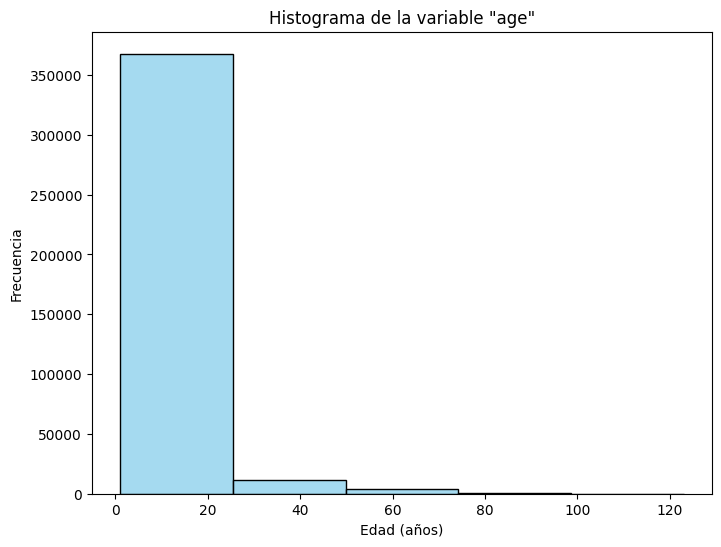

In [67]:
# Histograma variable 'age'.
plt.figure(figsize = (8, 6))
sns.histplot(data = cars_df, x = 'age', bins = 5, color = 'skyblue')

# Etiquetas y título.
plt.title('Histograma de la variable "age"')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')

# Mostrar histograma.
plt.show()

<Axes: xlabel='age', ylabel='Count'>

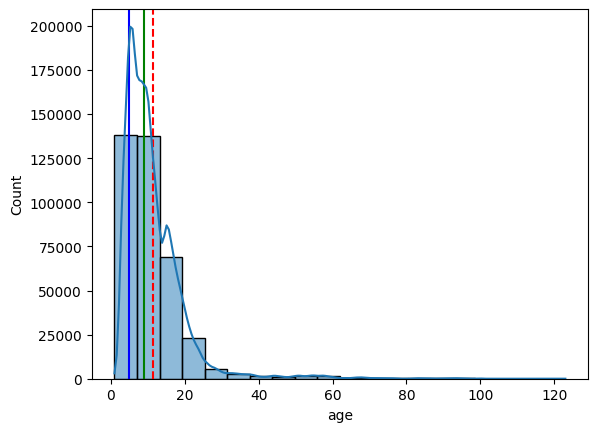

In [68]:
media = cars_df['age'].mean()
median = cars_df['age'].median()
mode = cars_df['age'].mode().iloc[0]
plt.axvline(x = media, linestyle = '--', color = 'red')
plt.axvline(x = median, linestyle = '-', color = 'green')
plt.axvline(x = mode, linestyle = '-', color = 'blue')
sns.histplot(data = cars_df, x = 'age', kde = True, bins = 20)

4a) Para visualizar si hay valores atípicos, se generan gráficos de box plot para las tres variables (`price, age, odometer`)

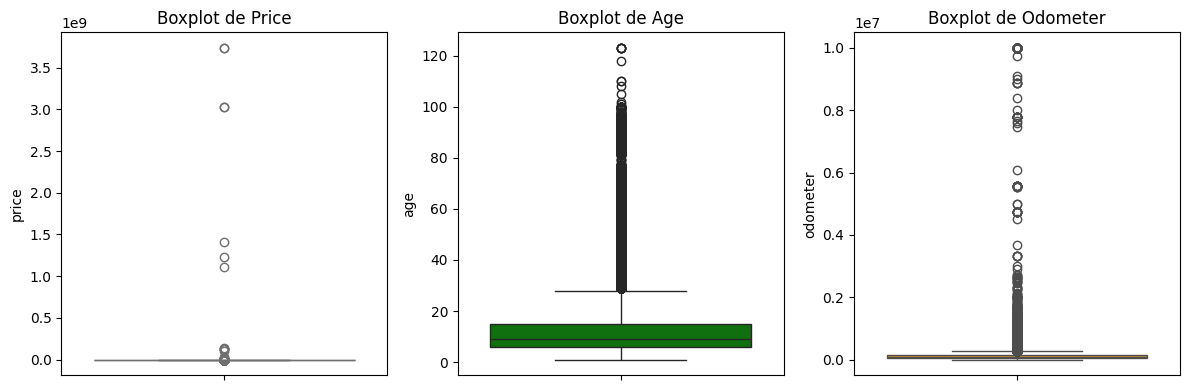

In [69]:
# Subgráficos para los boxplots.
plt.figure(figsize = (12, 4))

# Boxplot variable 'price'.
plt.subplot(1, 3, 1)
sns.boxplot(data = cars_df, y = 'price', color = 'skyblue')
plt.title('Boxplot de Price')

# Boxplot variable 'age'.
plt.subplot(1, 3, 2)
sns.boxplot(data = cars_df, y = 'age', color = 'green')
plt.title('Boxplot de Age')

# Boxplot variable 'odometer'.
plt.subplot(1, 3, 3)
sns.boxplot(data = cars_df, y = 'odometer', color = 'orange')
plt.title('Boxplot de Odometer')

# Mostrar boxplots.
plt.tight_layout()
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque se sabe que deben andar alrededor de un 5% del conjunto total de datos), se debe de realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Se calcula, para cada variable, el porcentaje de sus valores atípicos y se elimínan del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [70]:
# IQR variables 'price'.
Q1_price = cars_df['price'].quantile(0.25)
Q3_price = cars_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# IQR variable 'age'.
Q1_age = cars_df['age'].quantile(0.25)
Q3_age = cars_df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# IQR variable 'odometer'.
Q1_odometer = cars_df['odometer'].quantile(0.25)
Q3_odometer = cars_df['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

# Límites valores atípicos 'price'.
limite_inferior_price = Q1_price - 1.5 * IQR_price
limite_superior_price = Q3_price + 1.5 * IQR_price

# Límites valores atípicos 'age'.
limite_inferior_age = Q1_age - 1.5 * IQR_age
limite_superior_age = Q3_age + 1.5 * IQR_age

# Límites valores atípicos 'odometer'.
limite_inferior_odometer = Q1_odometer - 1.5 * IQR_odometer
limite_superior_odometer = Q3_odometer + 1.5 * IQR_odometer

# Porcentaje de valores atípicos y su eliminación.
porcentaje_valores_atipicos_price = ((cars_df['price'] < limite_inferior_price) | (cars_df['price'] > limite_superior_price)).mean() * 100
porcentaje_valores_atipicos_age = ((cars_df['age'] < limite_inferior_age) | (cars_df['age'] > limite_superior_age)).mean() * 100
porcentaje_valores_atipicos_odometer = ((cars_df['odometer'] < limite_inferior_odometer) | (cars_df['odometer'] > limite_superior_odometer)).mean() * 100

# Eliminación de los valores atípicos del DataFrame.
cars_df = cars_df[(cars_df['price'] >= limite_inferior_price) & (cars_df['price'] <= limite_superior_price) &
                  (cars_df['age'] >= limite_inferior_age) & (cars_df['age'] <= limite_superior_age) &
                  (cars_df['odometer'] >= limite_inferior_odometer) & (cars_df['odometer'] <= limite_superior_odometer)]

# Mostrar Resultados.
print(f"Porcentaje de valores atípicos en 'price': {porcentaje_valores_atipicos_price:.2f}%")
print(f"Porcentaje de valores atípicos en 'age': {porcentaje_valores_atipicos_age:.2f}%")
print(f"Porcentaje de valores atípicos en 'odometer': {porcentaje_valores_atipicos_odometer:.2f}%")


Porcentaje de valores atípicos en 'price': 1.64%
Porcentaje de valores atípicos en 'age': 3.14%
Porcentaje de valores atípicos en 'odometer': 0.81%


4c) Se dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

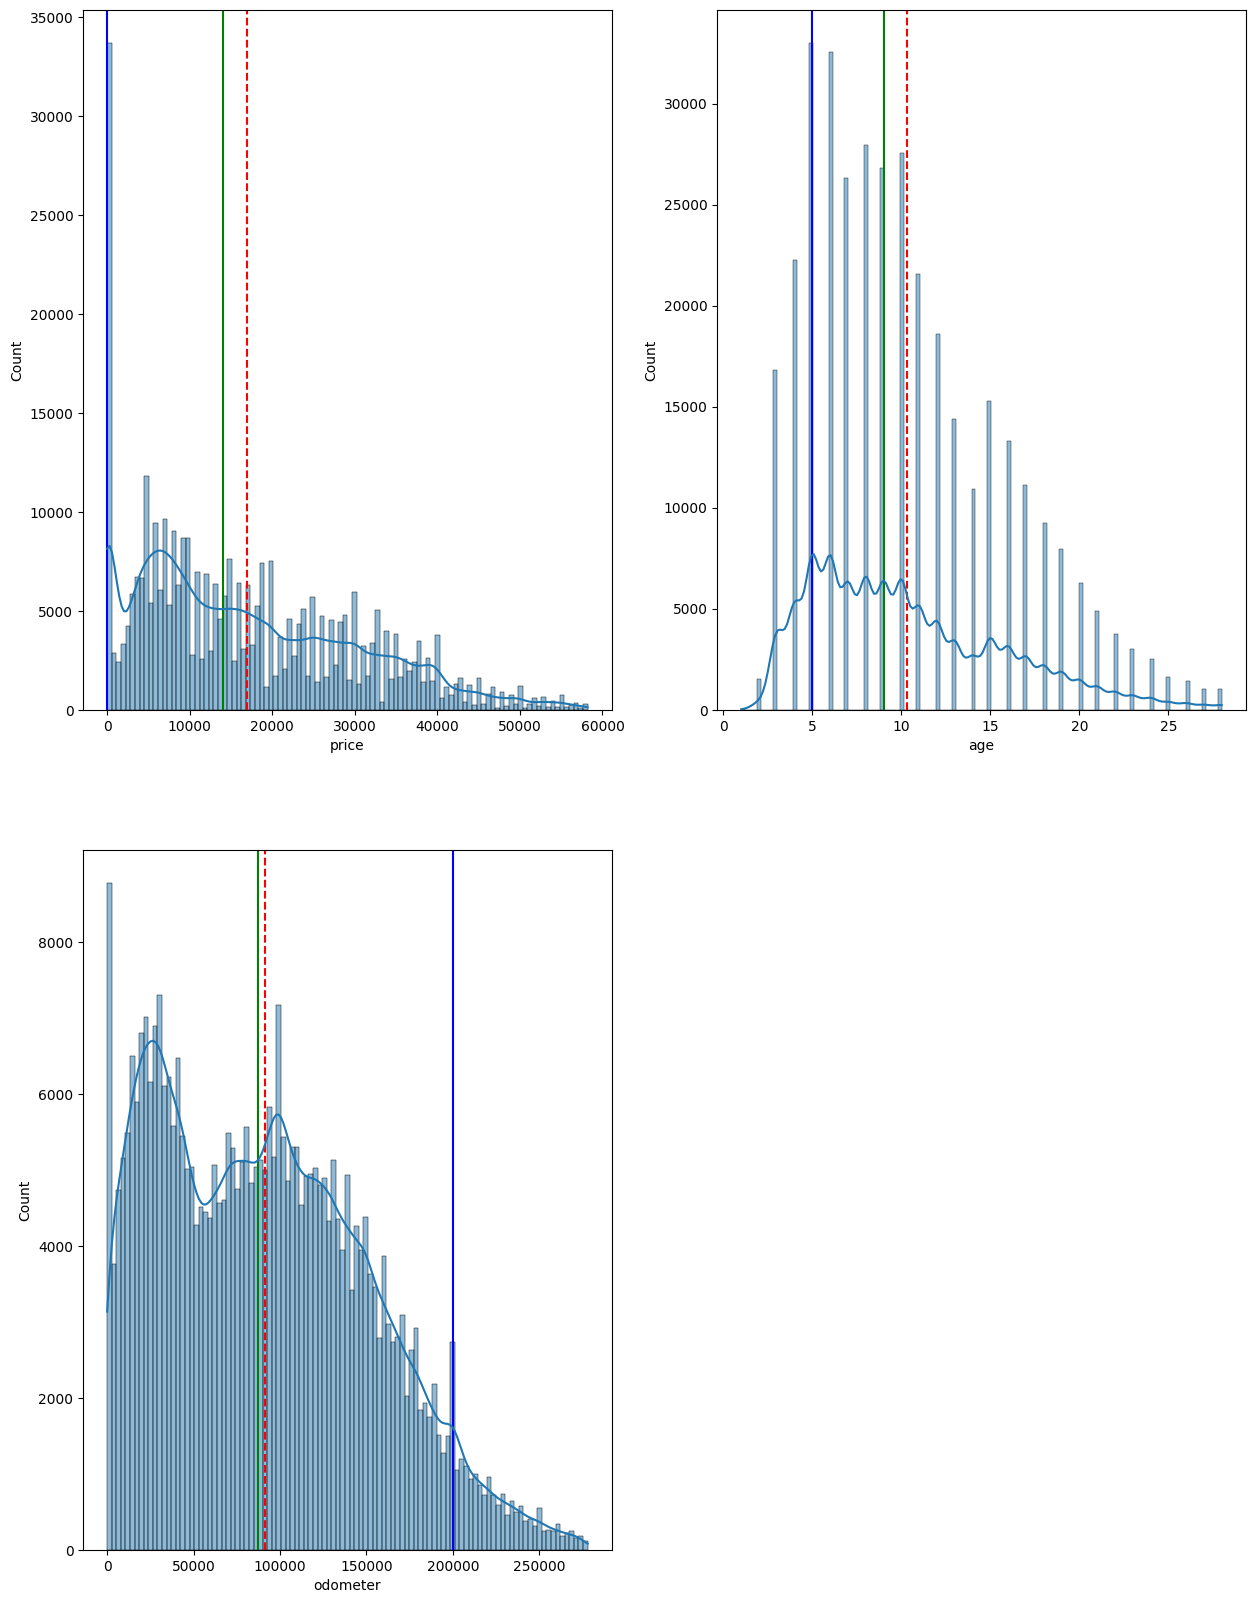

In [71]:
plt.figure(figsize = (15, 20))
for i, col in enumerate(['price', 'age', 'odometer'], 1):
    media = cars_df[col].mean()
    median = cars_df[col].median()
    mode = cars_df[col].mode().iloc[0]
    plt.subplot(2,2,i)
    plt.axvline(x = media, linestyle = '--', color = 'red')
    plt.axvline(x = median, linestyle = '-', color = 'green')
    plt.axvline(x = mode, linestyle = '-', color = 'blue')
    sns.histplot(data = cars_df, x = col, kde = True)

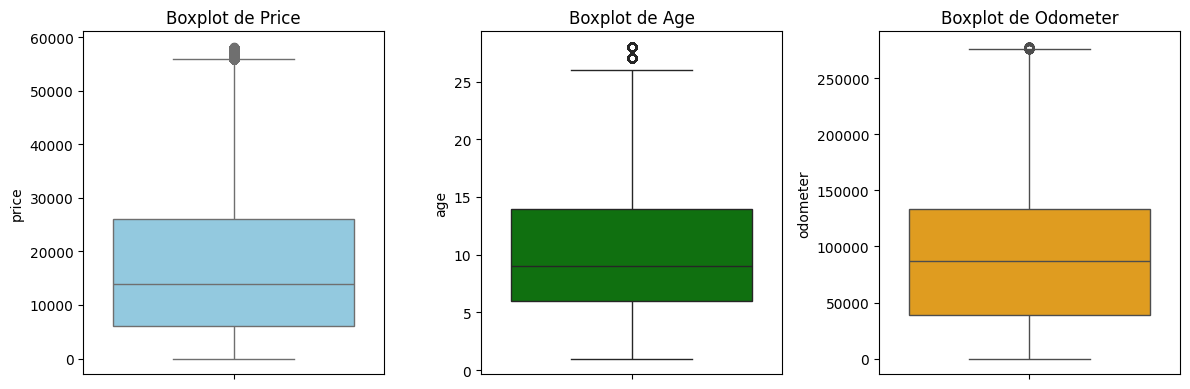

In [72]:
# Subgráficos para los boxplots.
plt.figure(figsize = (12, 4))

# Boxplot variable 'price'.
plt.subplot(1, 3, 1)
sns.boxplot(data = cars_df, y = 'price', color = 'skyblue')
plt.title('Boxplot de Price')

# Boxplot variable 'age'.
plt.subplot(1, 3, 2)
sns.boxplot(data = cars_df, y = 'age', color = 'green')
plt.title('Boxplot de Age')

# Boxplot variable 'odometer'.
plt.subplot(1, 3, 3)
sns.boxplot(data = cars_df, y = 'odometer', color = 'orange')
plt.title('Boxplot de Odometer')

# Mostrar boxplots.
plt.tight_layout()
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar el escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


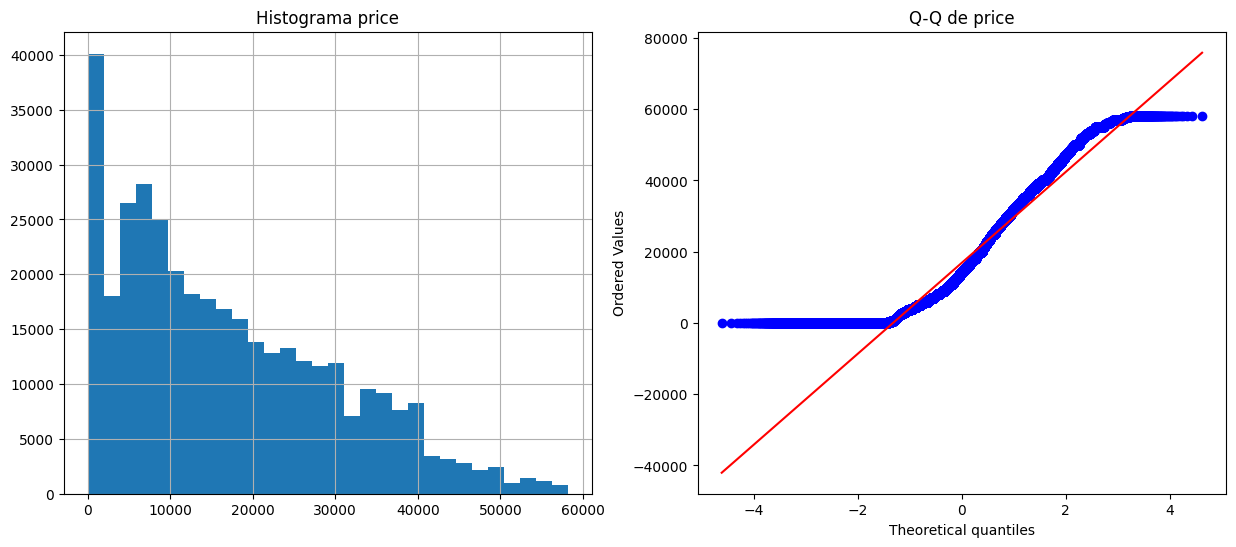

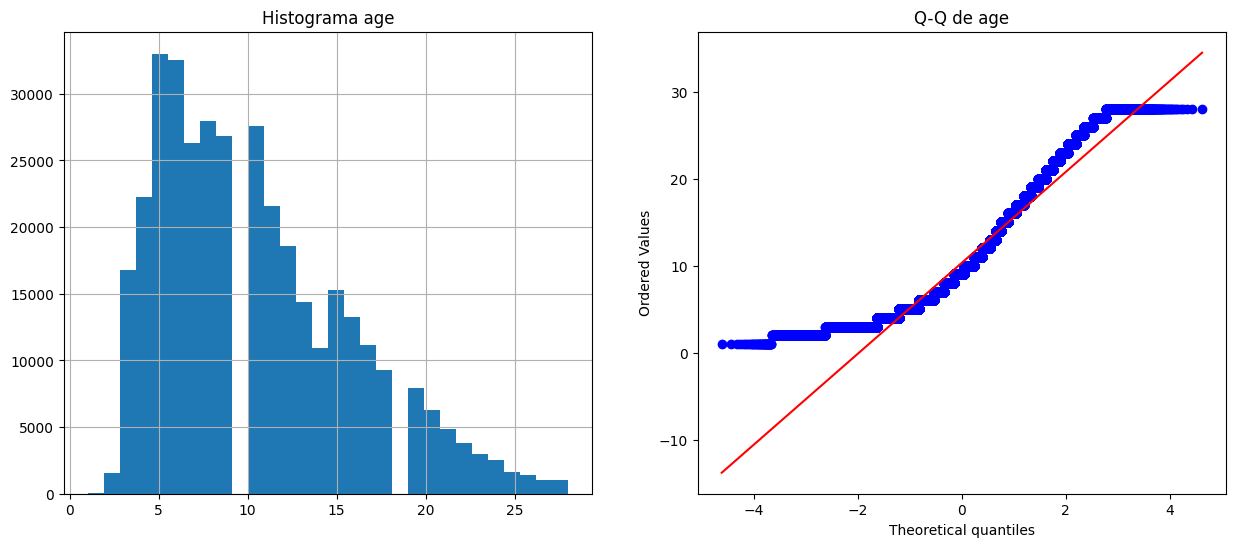

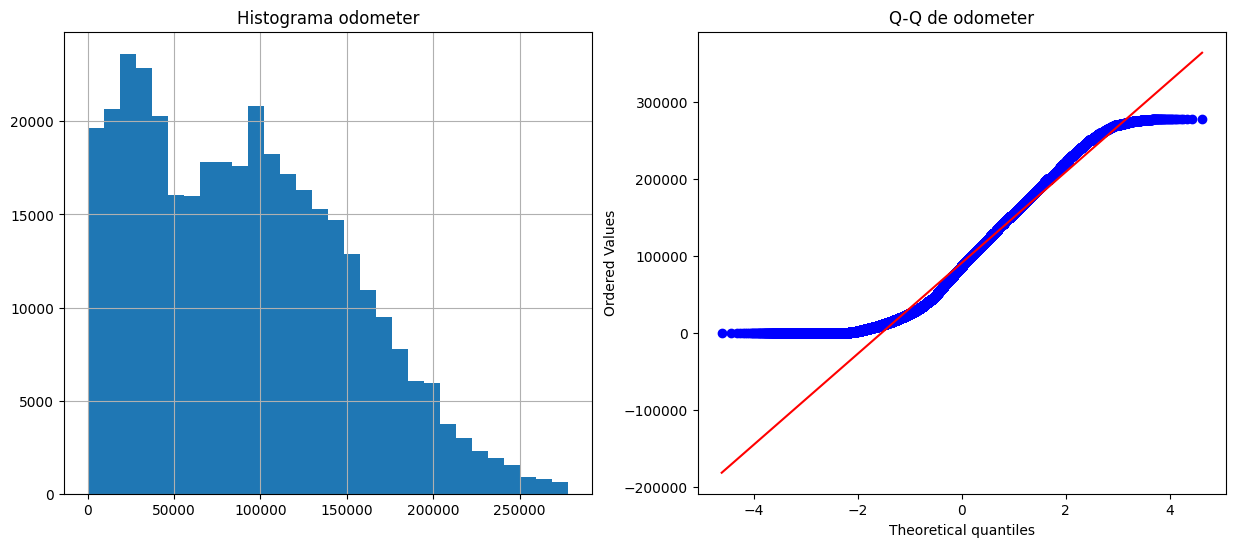

In [73]:
# Función para generar gráficos Q-Q e histograma para observar diferencias entre la distribución y la normal.
def diagnostic_plots(df, variable):

    plt.figure(figsize = (15, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    df[variable].hist(bins = 30)
    plt.title(f"Histograma {variable}")

    # Gráficos Q-Q
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.title(f"Q-Q de {variable}")
    plt.show()

# Aplicación de la función a variables.
diagnostic_plots(cars_df, "price")
diagnostic_plots(cars_df, "age")
diagnostic_plots(cars_df, "odometer")

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Se aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Se hace en una copia del dataframe a la que se denominará `transf_df`.

In [74]:
# Copia del DataFrame 'cars_df'.
transf_df = cars_df.copy()

# Transformación Yeo-Johnson a la variable 'price'.
transf_df['price'], _ = yeojohnson(transf_df['price'])

# Transformación Yeo-Johnson a la variable 'age'.
transf_df['age'], _ = yeojohnson(transf_df['age'])

# Transformación Yeo-Johnson a la variable 'odometer'.
transf_df['odometer'], _ = yeojohnson(transf_df['odometer'])

5c) Se dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

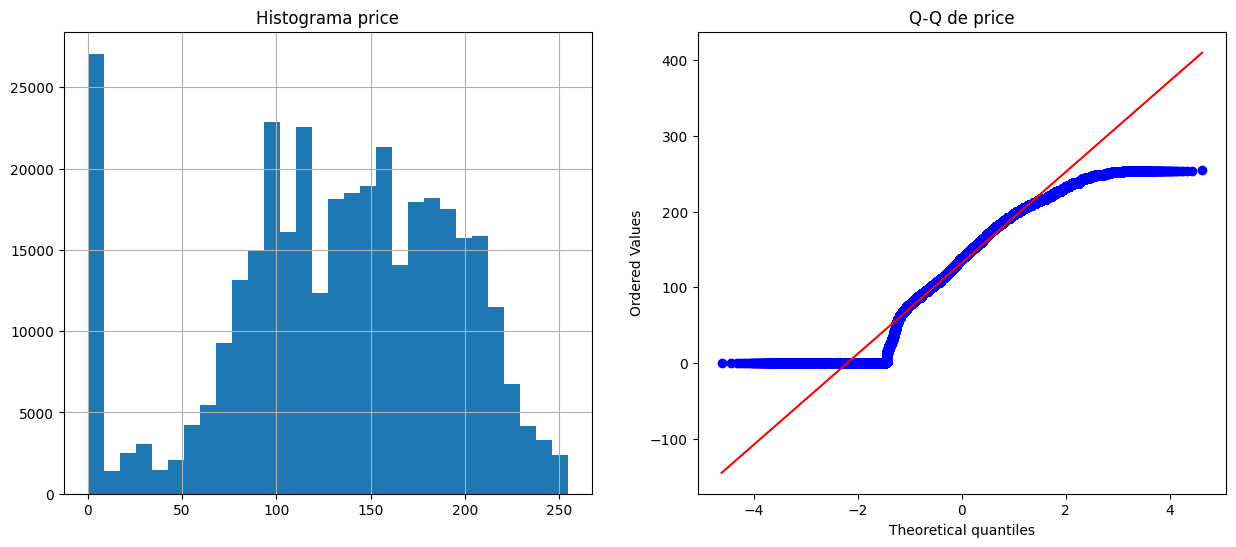

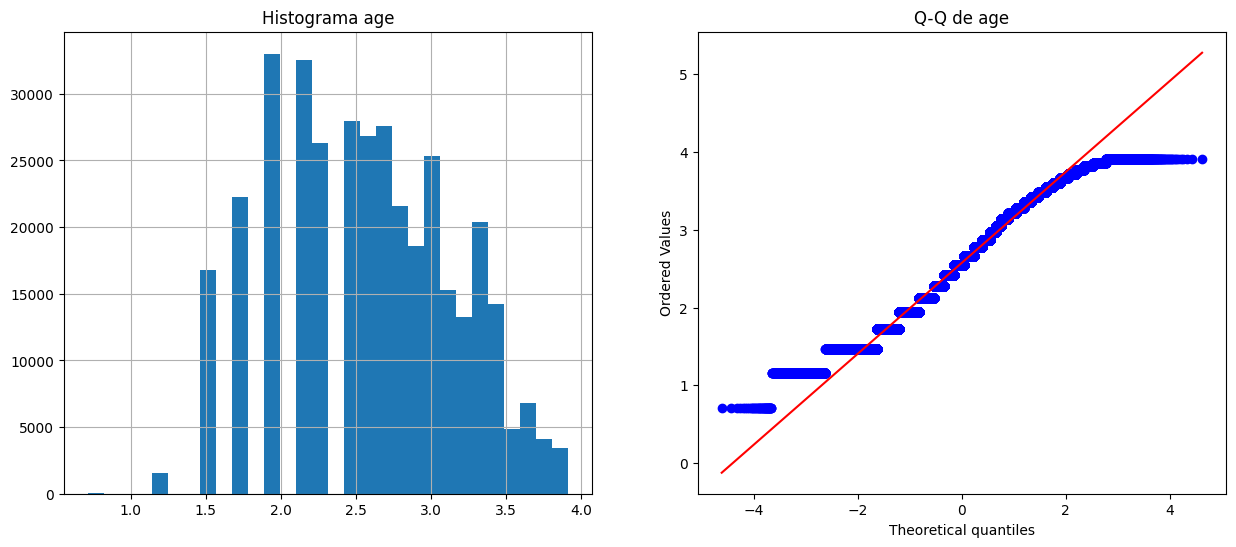

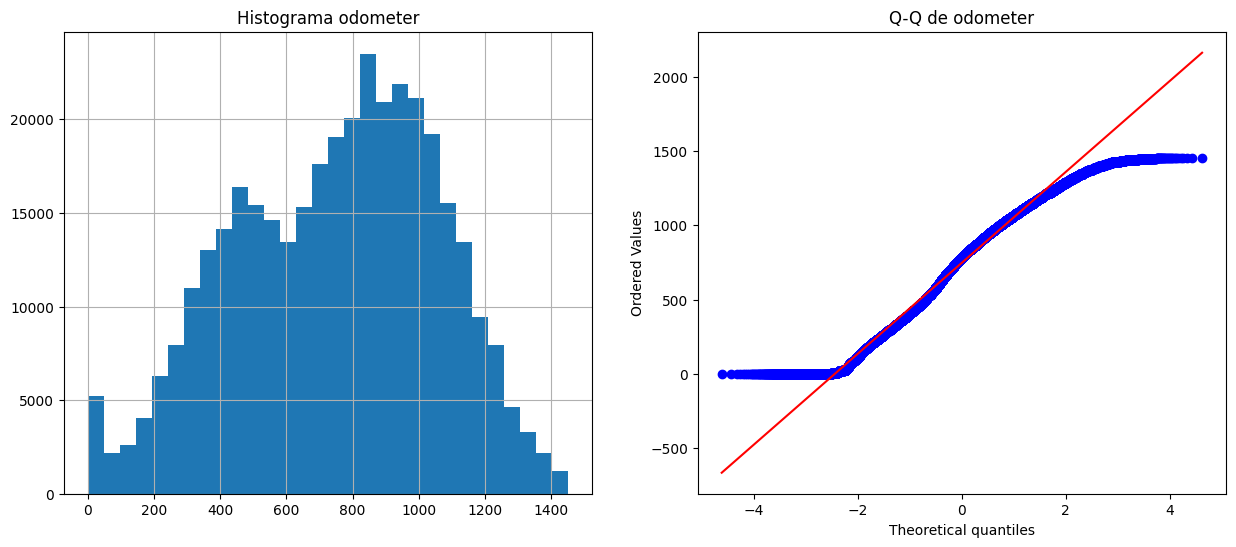

In [75]:
# Función para generar gráficos Q-Q e histograma para observar diferencias entre la distribución y la normal.
def diagnostic_plots(df, variable):

    plt.figure(figsize = (15, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    df[variable].hist(bins = 30)
    plt.title(f"Histograma {variable}")

    # Gráficos Q-Q
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.title(f"Q-Q de {variable}")
    plt.show()

# Aplicación de la función a variables.
diagnostic_plots(transf_df, "price")
diagnostic_plots(transf_df, "age")
diagnostic_plots(transf_df, "odometer")

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, se aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Se hace en una copia del dataframe a la que se denominará `minmax_df`.


In [76]:
# Copia del DataFrame 'transf_df'.
minmax_df = transf_df.copy()

# Variables a escalar: 'price', 'odometer' y 'age'.
variables_a_escalar = ['price', 'odometer', 'age']

# Crea una instancia del escalador Min-Max.
scaler = MinMaxScaler()

# Aplica la transformación Min-Max a las variables seleccionadas en 'minmax_df'.
minmax_df[variables_a_escalar] = scaler.fit_transform(minmax_df[variables_a_escalar])

6b) Se dibuja nuevamente los histogramas para verificar que el escalamiento no cambie la distribución.

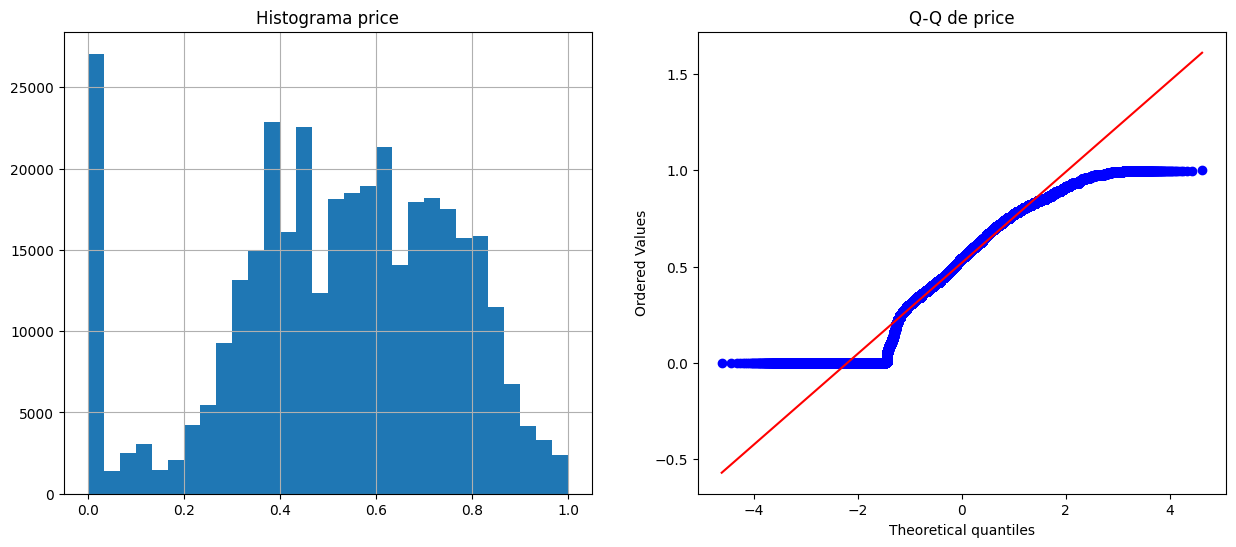

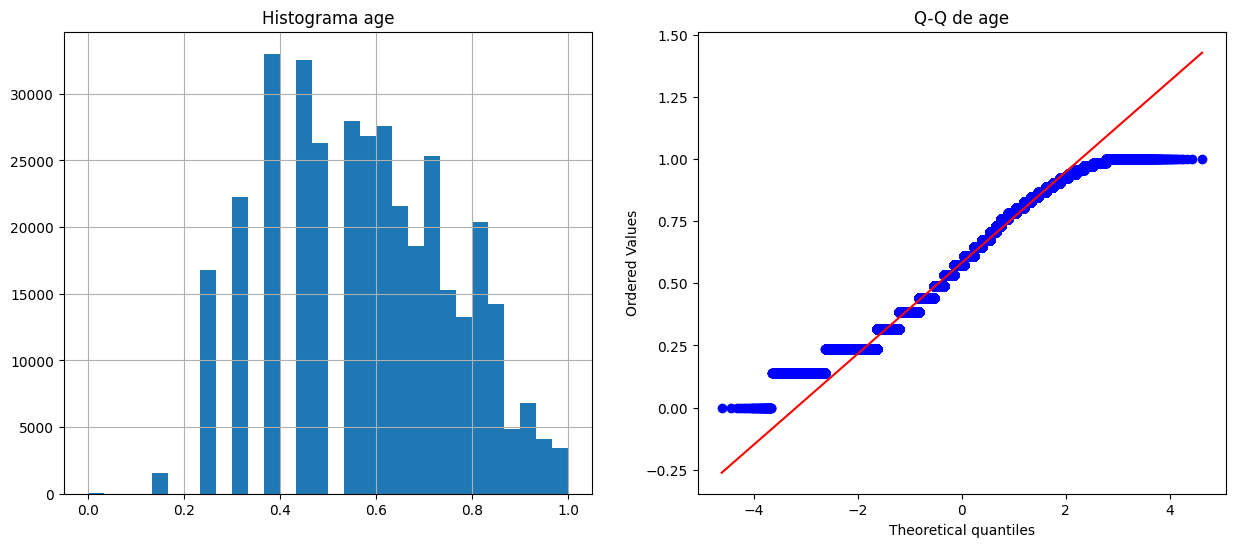

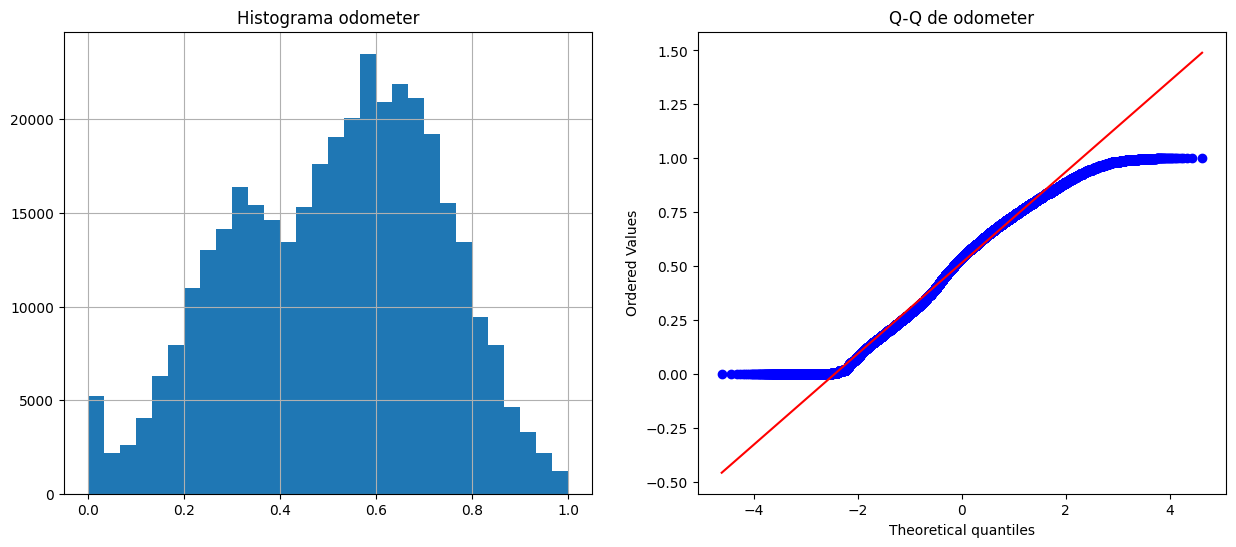

In [77]:
# Función para generar gráficos Q-Q e histograma para observar diferencias entre la distribución y la normal.
def diagnostic_plots(df, variable):

    plt.figure(figsize = (15, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    df[variable].hist(bins = 30)
    plt.title(f"Histograma {variable}")

    # Gráficos Q-Q
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.title(f"Q-Q de {variable}")
    plt.show()

# Aplicación de la función a variables.
diagnostic_plots(minmax_df, "price")
diagnostic_plots(minmax_df, "age")
diagnostic_plots(minmax_df, "odometer")

## Codificando variables categóricas


7a) Se utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [78]:
# Estadísticas descriptivas de las variables categóricas. Resultados transpuestos.
minmax_df.describe(include = 'object').T

,count,unique,top,freq
region,362763,404,columbus,3015
region_url,362763,413,https://grandrapids.craigslist.org,2743
manufacturer,362763,40,ford,61186
model,362763,19263,f-150,7197
fuel,362763,5,gas,309289
title_status,362763,6,clean,351101
transmission,362763,3,automatic,288241
type,362763,13,sedan,153765
state,362763,51,ca,42325


7b) Según la cardinalidad observada, se separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [79]:
# Umbral para alta o baja cardinalidad.
umbral_cardinalidad = 100

# Listas para variables con alta y baja cardinalidad.
highly_cardinal_variables = []
few_cardinal_variables = []

# Separar variables categóricas según su cardinalidad.
for columna in minmax_df.select_dtypes(include = ['object']).columns:
    if minmax_df[columna].nunique() > umbral_cardinalidad:
        highly_cardinal_variables.append(columna)
    else:
        few_cardinal_variables.append(columna)

# Muestra las listas de variables.
print("Variables con alta cardinalidad:", highly_cardinal_variables)
print("Variables con baja cardinalidad:", few_cardinal_variables)

Variables con alta cardinalidad: ['region', 'region_url', 'model']
Variables con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Se visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

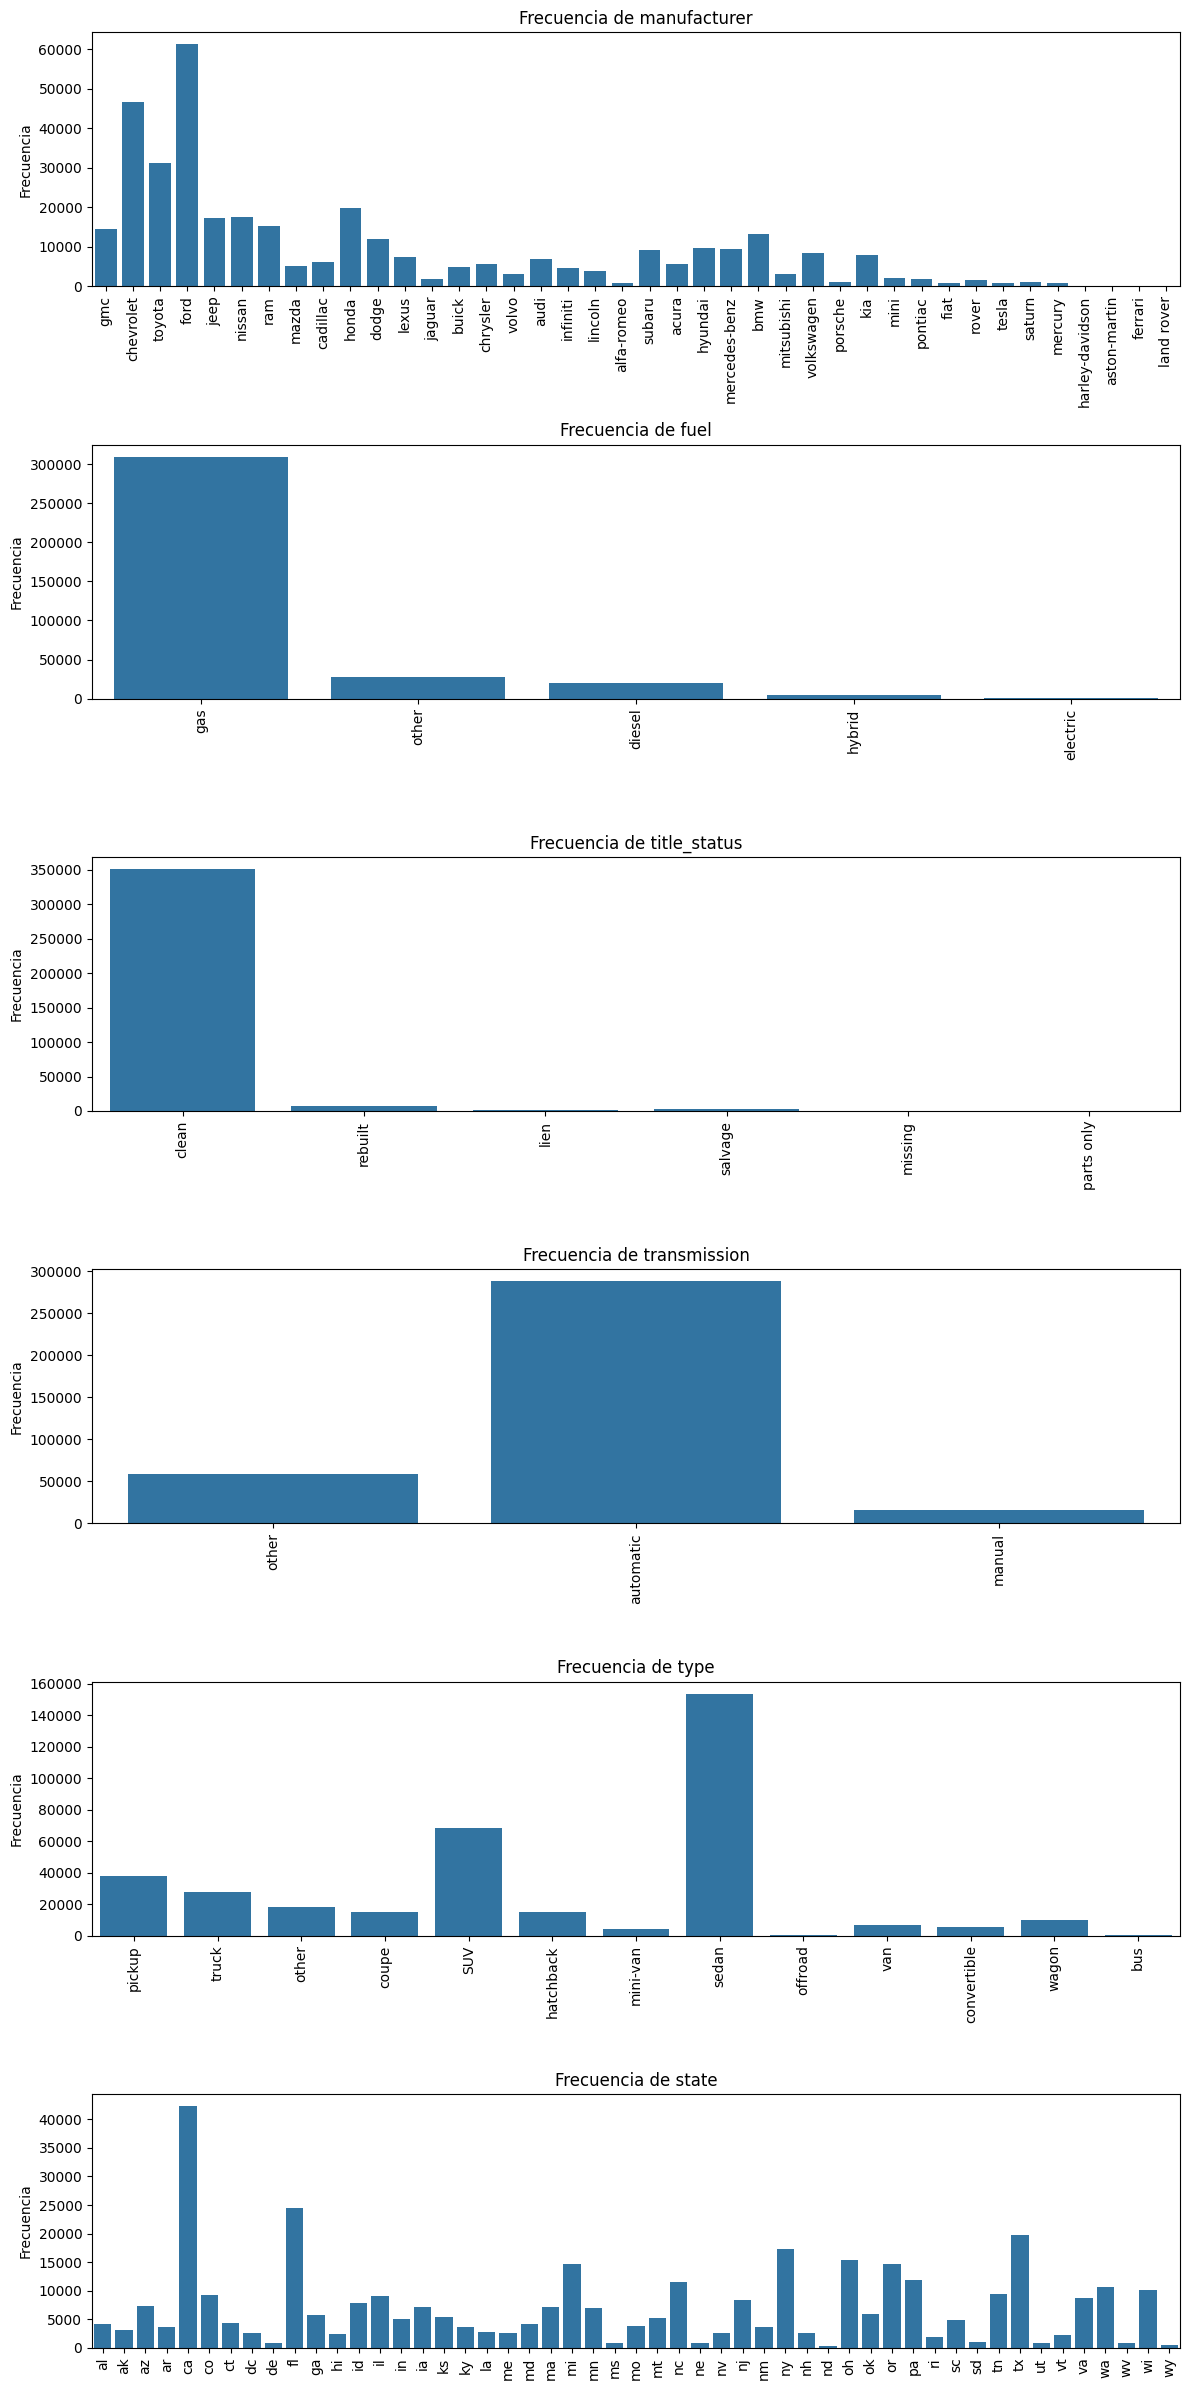

In [80]:
# Subplots para mostrar múltiples gráficos de barras.
num_variables = len(few_cardinal_variables)
fig, axes = plt.subplots(num_variables, 1, figsize=(12, 4 * num_variables))

# Itera a través de las variables categóricas y crea gráficos de barras para cada una.
for i, variable in enumerate(few_cardinal_variables):
    sns.countplot(data=minmax_df, x=variable, ax=axes[i])
    axes[i].set_title(f'Frecuencia de {variable}')
    axes[i].set_xlabel('')  # Eliminamos las etiquetas en el eje x
    axes[i].set_ylabel('Frecuencia')

    # Rotación de etiquetas.
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(90)

plt.tight_layout()
plt.show()

8. Se aplica la codificación *one-hot* a las variables en `few_cardinal_variables`.


In [81]:
# OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, drop = 'first')
encoded_data_f = encoder.fit_transform(minmax_df[few_cardinal_variables])

# Nombres para nuevas columnas generadas.
encoded_columns_f = encoder.get_feature_names_out(few_cardinal_variables)

# Resultados en un nuevo DataFrame
few_cardinal_encoded_df = pd.DataFrame(encoded_data_f, columns = encoded_columns_f)

In [82]:
few_cardinal_encoded_df

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362760,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Se aplica la codificación binaria a las variables en `highly_cardinal_variables`.

In [83]:
# Crea una instancia de BinaryEncoder.
encoder = ce.BinaryEncoder(cols = highly_cardinal_variables)
encoded_data_h = encoder.fit_transform(minmax_df[highly_cardinal_variables])

# Nombres para nuevas columnas generadas.
encoded_columns_h = encoder.get_feature_names_out(highly_cardinal_variables)

# Resultados en un nuevo DataFrame
highly_cardinal_encoded_df = pd.DataFrame(encoded_data_h, columns = encoded_columns_h)

In [84]:
highly_cardinal_encoded_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,1
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,0


10. Se concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y se eliminan las columnas categóricas originales. Se toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Se utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [85]:
# Eliminar variables categóricas del DataFrame.
variables_a_mantener = ['price', 'odometer', 'age']
minmax_df = minmax_df[variables_a_mantener]

# Reestablecer índices en DataFrames.
minmax_df.reset_index(drop = True, inplace = True)
few_cardinal_encoded_df.reset_index(drop = True, inplace = True)
highly_cardinal_encoded_df.reset_index(drop = True, inplace = True)

# Concatenación de DataFrames.
concatenated_df = pd.concat([minmax_df, few_cardinal_encoded_df, highly_cardinal_encoded_df], axis = 1)

In [86]:
concatenated_df

,price,odometer,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.788278,0.434618,0.573891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.663623,0.485128,0.704325,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.846457,0.241182,0.237382,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.761221,0.362228,0.439716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.555366,0.662411,0.610453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362758,0.676226,0.318147,0.316887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,1,1
362759,0.756945,0.188153,0.237382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
362760,0.802353,0.106799,0.237382,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,1
362761,0.739512,0.306860,0.382998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,0,0
